In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load an image of the road
image_path = 'road1.webp'
road_image = cv2.imread(image_path)
road_image = cv2.cvtColor(road_image, cv2.COLOR_BGR2RGB)

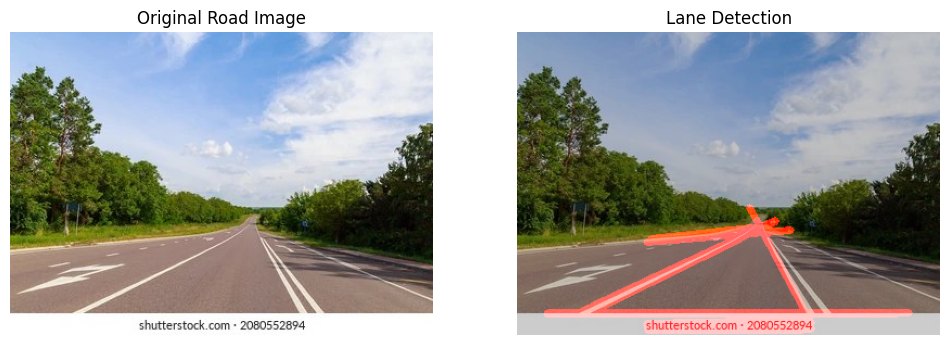

In [3]:
# Convert the image to grayscale
gray_image = cv2.cvtColor(road_image, cv2.COLOR_RGB2GRAY)

# Apply Gaussian blur to reduce noise and improve lane detection
blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)

# Use Canny edge detection to find potential lane edges
edges = cv2.Canny(blurred_image, 50, 150)

# Define a region of interest (ROI) to focus on the lanes
height, width = edges.shape
roi_vertices = [(0, height), (width / 2, height / 2), (width, height)]
mask = np.zeros_like(edges)
cv2.fillPoly(mask, np.array([roi_vertices], np.int32), 255)
roi_edges = cv2.bitwise_and(edges, mask)

# Use Hough Transform to detect lines in the ROI
lines = cv2.HoughLinesP(roi_edges, 1, np.pi/180, threshold=50, minLineLength=100, maxLineGap=50)

# Draw the detected lines on the original image
line_image = np.zeros_like(road_image)
for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(line_image, (x1, y1), (x2, y2), (255, 0, 0), 5)

# Combine the original image with the detected lane lines
lane_detected_image = cv2.addWeighted(road_image, 0.8, line_image, 1, 0)

# Display the original and processed images
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(road_image)
plt.title('Original Road Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(lane_detected_image)
plt.title('Lane Detection')
plt.axis('off')

plt.show()


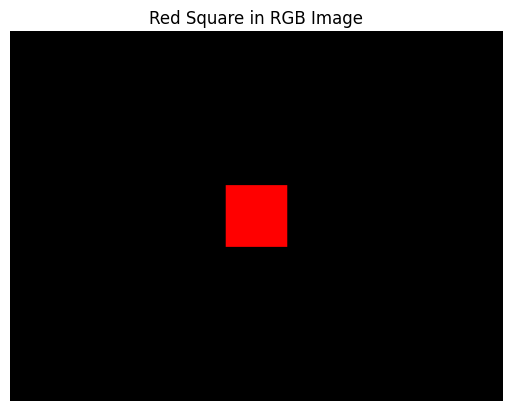

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Create a black image with a specified width and height
width, height = 400, 300
rgb_image = np.zeros((height, width, 3), dtype=np.uint8)

# Set pixel values to create a red square in the center
center_x, center_y = width // 2, height // 2
size = 50
rgb_image[center_y - size//2:center_y + size//2, center_x - size//2:center_x + size//2, 0] = 255  # Red channel

# Display the RGB image
plt.imshow(rgb_image)
plt.title('Red Square in RGB Image')
plt.axis('off')
plt.show()
